# Basismodul Computerlinguistik
### Übung


Yannick Kaiser \
Y.Kaiser@campus.lmu.de

### Heute

- Hausaufgabe 3
- Kommandozeilenargumente
- Daciuk's Algorithmus

## Hausaufgabe 3


Wir definieren für diese Aufgabe die **Eingabeformate** für den Konstruktor (= ```__init__```) der Klasse wie folgt:
- **$\Sigma$** ist ein ```set``` von Symbolen
- **Q** ist ein ```set``` von Zahlen (den 'Namen' der Zustände)
- **s** ist ein Element aus Q
- **F** ist ein ```set``` von Elementen aus Q
- **$\delta$** ist ein ```set``` mit ```tuple```-Objekten der Länge 3, mit der Form ```(q_from,label,q_to)```

**a)** Denke dir Beispieldaten nach dem obrigen Schema aus, die später benutzt werden, um den Automaten zu initialisieren. Definiere dazu eine Variable für jedes der Symbole, und weise einen passenden, selbstgewählten Wert zu. 
Achte darauf, dass ein **endlicher, deterministischer** Automat entsteht!

**b)** Schreibe eine neue Klasse ```Automaton```, deren ```__init__```-Funktion die obrigen 5 Elemente annimmt.

**c)** Immer über das ```set``` $\delta$ zu iterieren ist langsam. Der Lookup in einem ```dict``` ist viel schneller! Ändere deshalb die ```__init__```-Funktion so, dass die Übergangsfunktion als Dictionary gespeichert wird. Die ```key```-Einträge sollen dabei Kombinationen von Zustand und Label sein, die ```value```-Einträge das Ziel des Übergangs.

**d)** Schreibe eine Methode ```transition(self,from,label)```, die einen Zustand oder ```None``` zurückliefert, je nachdem, ob es von ```from``` einen Übergang mit Label ```label``` gibt. Wenn es den Übergang gibt, so gib den Zielzustand zurück. Benutze für diese Methode das schnelle ```dict``` aus Aufgabe c).

**e)** Füge eine Methode ```accepts(self,sequence)``` hinzu, die eine Sequenz von Eingabesymbolen annimmt, und ```True``` oder ```False``` zurückliefert, je nachdem, ob dieser Automat die Eingabe akzeptiert. Benutze dazu die Funktion ```transition``` aus der letzten Aufgabe. 

**f)** Füge deiner Klasse ```Automaton``` oben folgende getter-Funktionen hinzu:
- ```get_Q(self)``` liefert ein ```set``` von Zustandsnahmen (Zahlen)
- ```get_F(self)``` liefert ein ```set``` von Finalzuständen
- ```get_s(self)``` liefert den Startzustand
- ```get_Sigma(self)``` liefert ein ```set``` von Symbolen
- ```get_Delta(self)``` liefert ein ```set``` von 3-Tupeln der Form ```(q_from,label,q_to)```


In [8]:
class Automaton():
    def __init__(self,Sigma,Q,s,F,delta):
        self.Sigma = Sigma
        self.Q = Q
        self.s = s
        self.F = F
        self.delta = delta
        self.delta_dict = {(q_from,label):q_to for q_from,label,q_to in delta}
        
    def transition(self,q_from,label):
        return self.delta_dict.get((q_from,label),None)
    
    def accepts(self,sequence):
        current_q = self.s
        
        for c in sequence:
            current_q = self.transition(current_q,c)
            if current_q == None:
                return False
                
        return current_q in self.F
    
    def get_Sigma(self):
        return self.Sigma
    
    def get_Q(self):
        return self.Q
    
    def get_s(self):
        return self.s
    
    def get_F(self):
        return self.F
    
    def get_Delta(self):
        return self.delta

In [9]:
import graphviz

def draw_automaton(A):

    g = graphviz.Digraph('Automaton')

    for state in A.get_Q():
        if state in A.get_F():
            g.attr('node',style='bold')
        if state == A.get_s():
            g.node(str(state), label="-> " + str(state))
        else:
            g.node(str(state))
        g.attr('node',style='solid')

    for x,label,z in A.get_Delta():
        g.edge(str(x),str(z),label=" " + label+ " ")

    return g


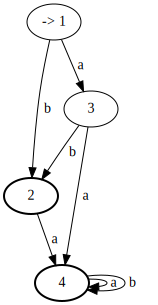

In [10]:
Sigma = {"a","b"}
s = 1
F = {2,4}
delta = {(1,"a",3),(1,"b",2),(2,"a",4),(3,"a",4),(3,"b",2),(4,"a",4),(4,"b",4)}
Q = {1,2,3,4}

A = Automaton(Sigma,Q,s,F,delta)
g = draw_automaton(A)
g

## Das ```argparse```-Modul

```python
import argparse
parser = argparse.ArgumentParser()
parser.parse_args()
```

### Vorteile von ```argparse```
- Nimmt viel Arbeit ab
- Erstellt automatisch Hilfetexte auf der Konsole

```
$ python3 my_program.py --help
usage: my_program.py [-h]

optional arguments:
  -h, --help  show this help message and exit
  ```

### Argumente hinzufügen


```python
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("echo") # <--
args = parser.parse_args()
print(args.echo)
```

```add_argument(...)``` ist wohl die wichtigste Funktion - die (optionalen) Argumente der Funktion lassen das Argument in vielerlei hinsicht modifizieren:
- Datentyp
- Pflichtargument vs. Optional
- Default-Wert
- Hilfe-String

### Hilfe-Strings

```python
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("echo", help="echo the string you use here")
args = parser.parse_args()
print(args.echo)
```

```
$ python3 prog.py -h
usage: prog.py [-h] echo

positional arguments:
  echo        echo the string you use here

optional arguments:
  -h, --help  show this help message and exit
```

### Datentyp festlegen

```python
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("square", help="display a square of a given number", type=int)
args = parser.parse_args()
print(args.square**2)
```

### Kurzformen festlegen

```python
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("-s", "--square", help="display a square of a given number", type=int)
args = parser.parse_args()
```

```
$ python3 prog.py --help
usage: prog.py [-h] [-s]

optional arguments:
  -h, --help     show this help message and exit
  -s, --square   display a square of a given number
```

### Default festlegen

```python
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("-s", "--square", help="display a square of a given number", type=int, default=1)
args = parser.parse_args()
```

## Daciuk's Algorithmus

> https://www.cis.uni-muenchen.de/people/Schulz/pw/StoyanLexAutomat.pdf